<a href="https://colab.research.google.com/github/n28neeraj/BSE_2nd_Seesion_Tutorial/blob/main/PCA_DimensionalityReduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dimensionality  Reduction using Principal Component Ananlysis**

In [ ]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)
%matplotlib inline

#Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')

In [ ]:
print(df.shape)
df.head()

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,125,171,255,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,213,142,176,253,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,253,210,32,12,0,6,206,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,253,253,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,248,253,253,43,20,20,20,20,5,0,5,20,20,37,150,150,150,147,10,0,0,0,0,0,0,0,0,0,248,253,253,253,253,253,253,253,168,143,166,253,253,253,253,253,253,253,123,0,0,0,0,0,0,0,0,0,174,253,253,253,253,253,253,253,253,253,253,253,249,247,247,169,117,117,57,0,0,0,0,0,0,0,0,0,0,118,123,123,123,166,253,253,253,155,123,123,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,252,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,244,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,254,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,228,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,251,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,254,205,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,215,254,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,198,176,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Prepare X and Y
Y = df.loc[:, '0']
X = df.drop(['0'], axis=1)

#2 Principal Components

In [ ]:
pca1 = PCA(n_components=2)
X_r1 = pca1.fit(X).transform(X)

In [ ]:
df_pca1 = pd.DataFrame(X_r1)

In [ ]:
pca1.explained_variance_ratio_

array([0.2225871, 0.0971276])

Text(0.5, 0.98, '2-Component PCA')

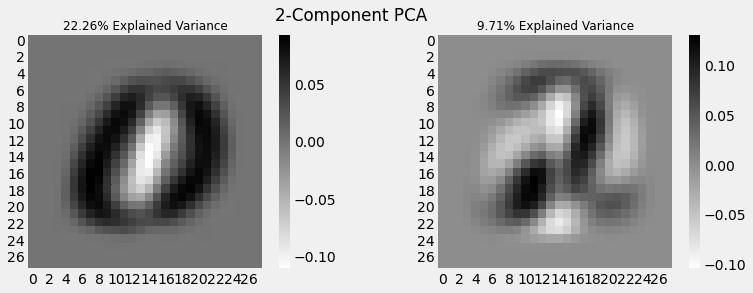

In [ ]:
import seaborn as sns
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca1.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca1.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca1.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca1.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

#Reconstruct image

In [ ]:
df_orig1 = pca1.inverse_transform(df_pca1)

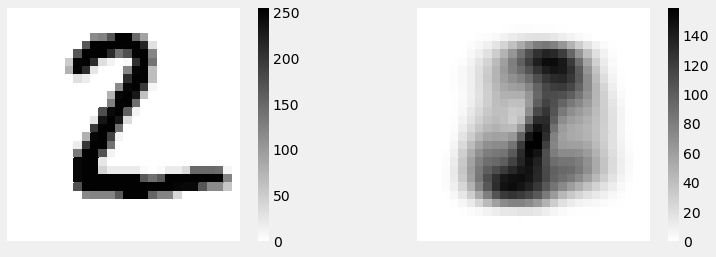

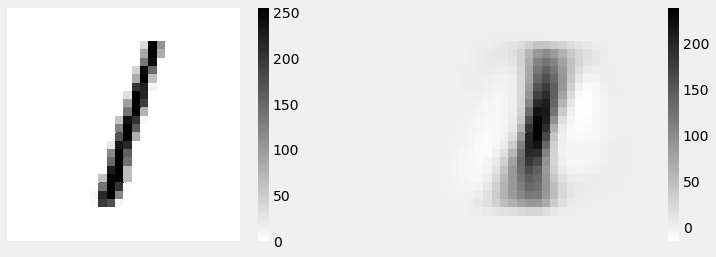

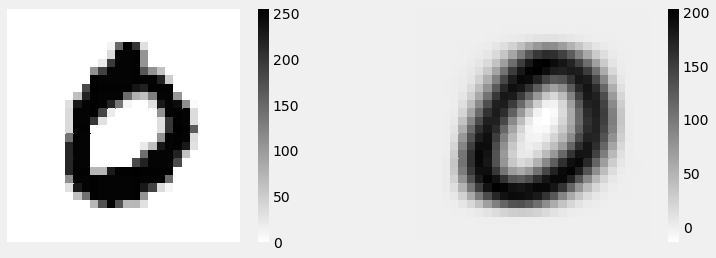

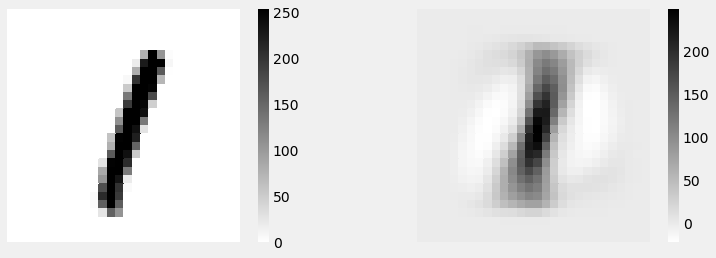

In [ ]:
for i in range(4):
  fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

  sns.heatmap(X.values[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[0])
  sns.heatmap(df_orig1[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[1])
  axarr[0].set_aspect('equal')
  axarr[0].axis('off')
  axarr[1].set_aspect('equal')
  axarr[1].axis('off')

#10 Principal Components

In [ ]:
pca2 = PCA(n_components=10)
X_r2 = pca2.fit(X).transform(X)
df_pca2 = pd.DataFrame(X_r2)

Text(0.5, 0.98, '4-Component')

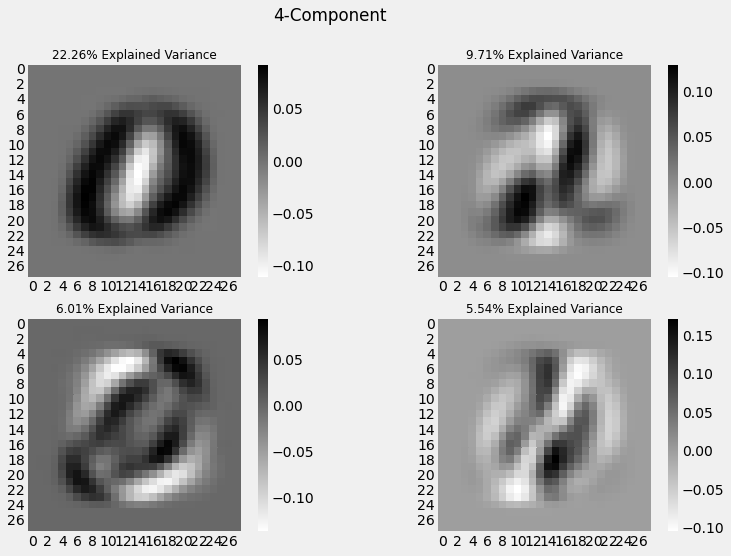

In [ ]:
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca2.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca2.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca2.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca2.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca2.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca2.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca2.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca2.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component')

#Reconstruct image

In [ ]:
df_orig2 = pca2.inverse_transform(df_pca2)

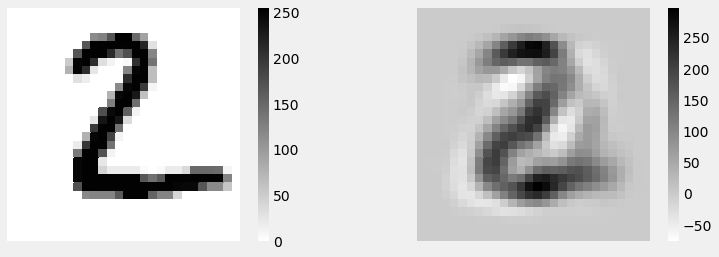

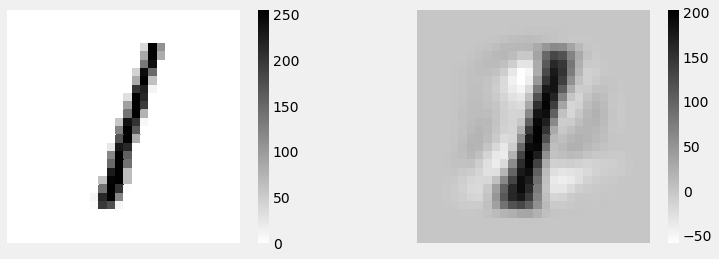

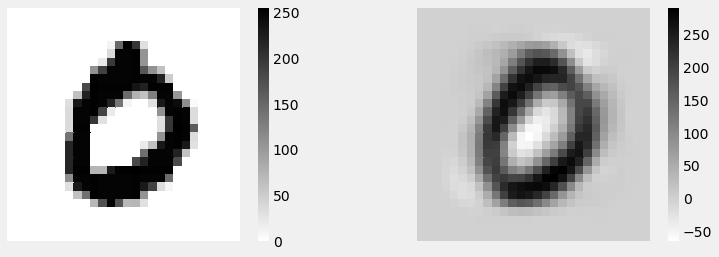

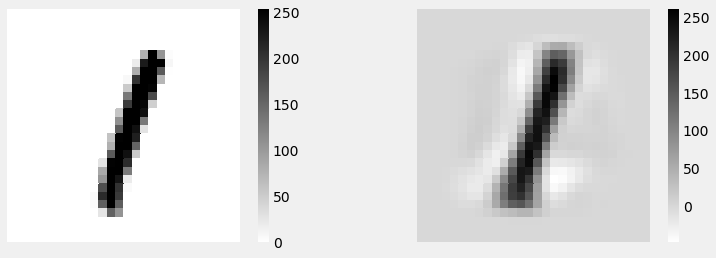

In [ ]:

for i in range(4):
  fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
  sns.heatmap(X.values[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[0])
  sns.heatmap(df_orig2[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[1])
  axarr[0].set_aspect('equal')
  axarr[0].axis('off')
  axarr[1].set_aspect('equal')
  axarr[1].axis('off')

#60 Principal Components

In [ ]:
pca3 = PCA(n_components=60)
X_r3 = pca3.fit(X).transform(X)
df_pca3 = pd.DataFrame(X_r3)

#Reconstruct image

In [ ]:
df_orig3 = pca3.inverse_transform(df_pca3)

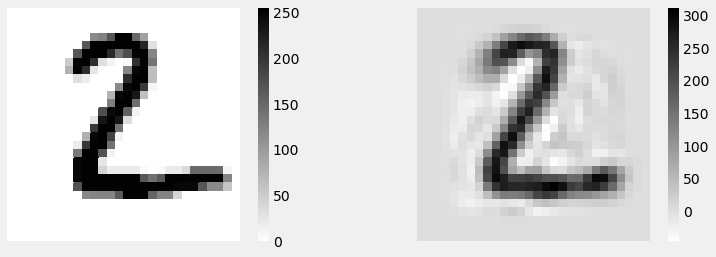

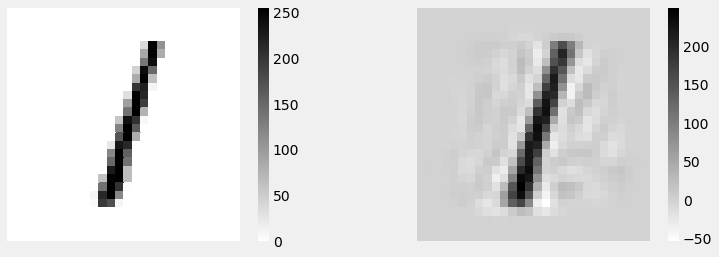

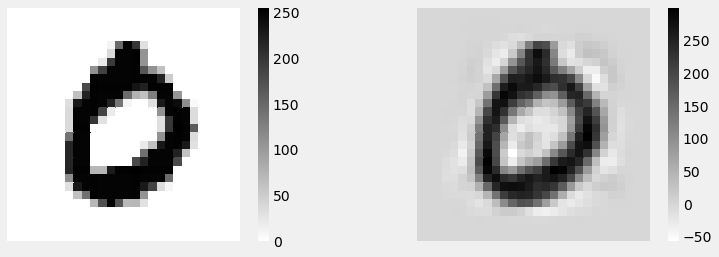

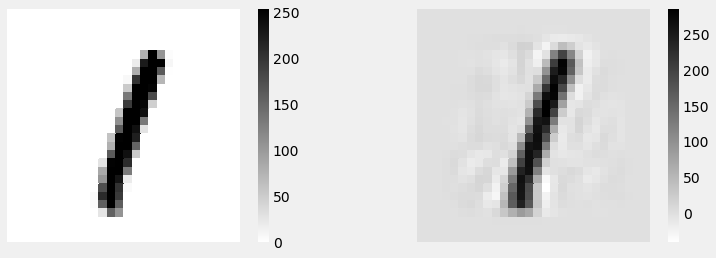

In [ ]:
for i in range(4):
  fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

  sns.heatmap(X.values[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[0])
  sns.heatmap(df_orig3[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[1])
  axarr[0].set_aspect('equal')
  axarr[0].axis('off')
  axarr[1].set_aspect('equal')
  axarr[1].axis('off')

#120 Principal Components

In [ ]:
pca4 = PCA(n_components=120)
X_r4 = pca4.fit(X).transform(X)
df_pca4 = pd.DataFrame(X_r4)

#Reconstruct image

In [ ]:
df_orig4 = pca4.inverse_transform(df_pca4)

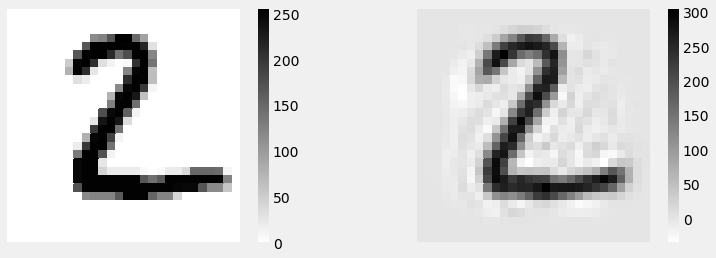

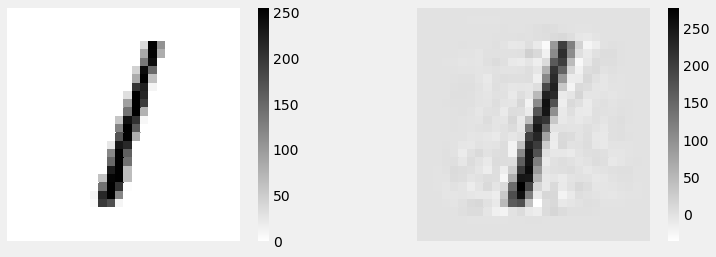

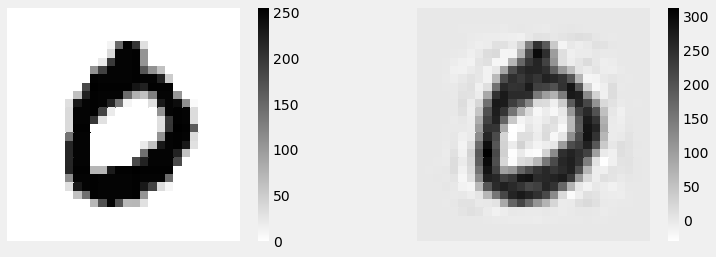

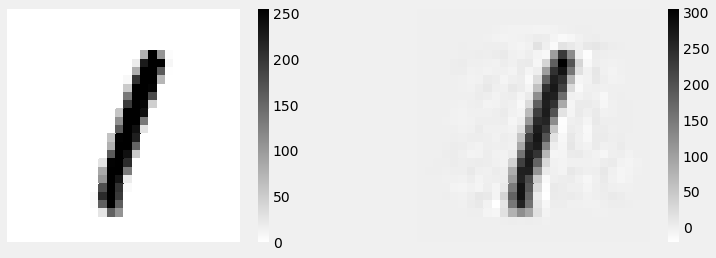

In [ ]:
for i in range(4):
  fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

  sns.heatmap(X.values[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[0])
  sns.heatmap(df_orig4[i].reshape(28, 28), cmap='gray_r',
              ax=axarr[1])
  axarr[0].set_aspect('equal')
  axarr[0].axis('off')
  axarr[1].set_aspect('equal')
  axarr[1].axis('off')

**Error Plot**

In [ ]:
from sklearn.preprocessing import normalize 
from sklearn.metrics import mean_squared_error
X_norm = normalize(X.values)

In [ ]:
def record_similarity(X, vector, metric=mean_squared_error):
    return pd.Series([mean_squared_error(X_norm[i, :], vector) for i in range(len(X_norm))])

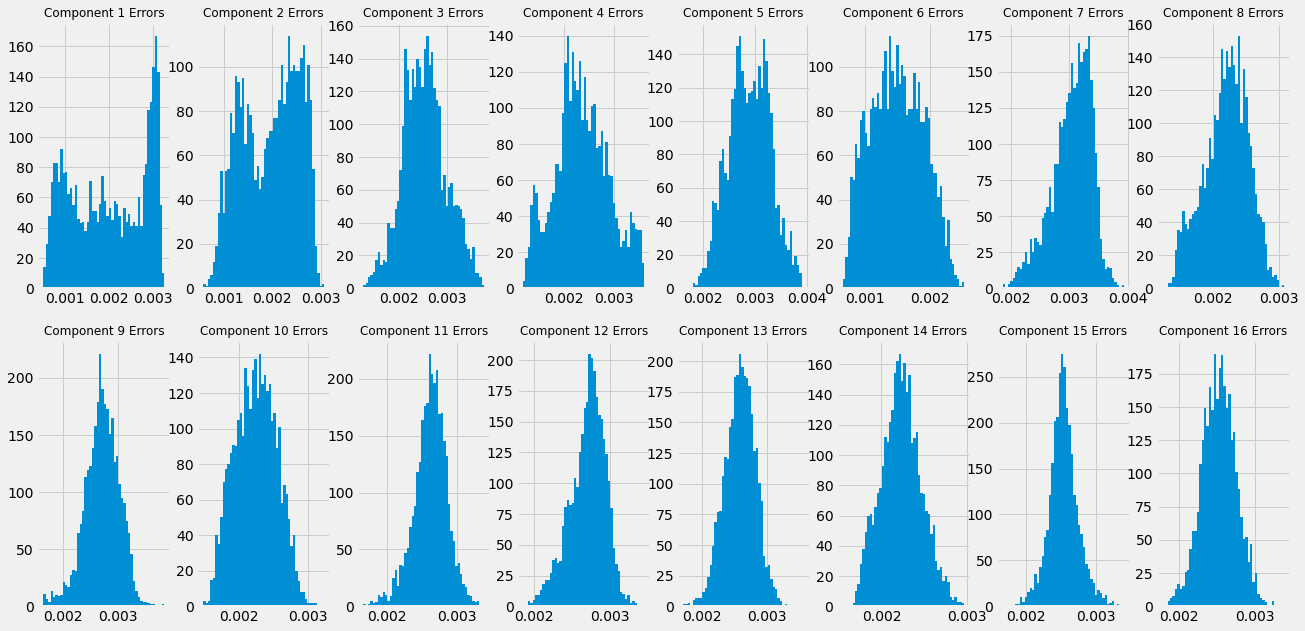

In [ ]:
fig, axar = plt.subplots(2, 8, figsize=(20, 10))
axar = np.array(axar).flatten()

for i in range(0, 16):
    record_similarity(X_norm, pca4.components_[i]).plot.hist(bins=50, ax=axar[i])
    axar[i].set_title("Component {0} Errors".format(i + 1), fontsize=12)
    axar[i].set_xlabel("")
    axar[i].set_ylabel("")